### All standard imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_samples, silhouette_score
plt.rc('font', size = 11)
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('Paired'))
sns.palplot(sns.color_palette('Paired'))
sns.set()

### Preprocessing the dataset

In [2]:
#import pandas as pd
dataset_read = pd.read_excel('pilot_experiment_TPM_WTonly.xlsx') #reading the dataset using pandas read_excel function
unprocessed_dataset = dataset_read.iloc[:, 0:].T #Transpose of the raw dataset
y = dataset_read.columns.values.tolist() #getting the label/target labels as list from the dataset 

y_categorized = [] 
sample_list = []
#assigning categorical label to 0-9 (ascending order) to y_categorized as label for each sample
for i in y:
    if i[:-2] == 'Ox_Leaf1_T1':
        y_categorized.append(0)
        sample_list.append('L1T1')
    elif i[:-2] == 'Ox_Leaf1_T2':
        y_categorized.append(1)
        sample_list.append('L1T2')
    elif i[:-2] == 'Ox_Leaf1_T3':
        y_categorized.append(2)
        sample_list.append('L1T3')
    elif i[:-2] == 'Ox_Leaf1_T4':
        y_categorized.append(3)
        sample_list.append('L1T4')
    elif i[:-2] == 'Ox_Leaf3_T2':
        y_categorized.append(4)
        sample_list.append('L3T2')
    elif i[:-2] == 'Ox_Leaf3_T3':
        y_categorized.append(5)
        sample_list.append('L3T3')
    elif i[:-2] == 'Ox_Leaf3_T4':
        y_categorized.append(6)
        sample_list.append('L3T4')
    elif i[:-2] == 'Ox_Leaf5_T3':
        y_categorized.append(7)
        sample_list.append('L5T3')
    elif i[:-2] == 'Ox_Leaf5_T4':
        y_categorized.append(8)
        sample_list.append('L5T4')
    elif i[:-2] == 'Ox_Leaf7_T4':
        y_categorized.append(9)
        sample_list.append('L7T4')

unprocessed_dataset['y'] = y_categorized #putting the label information with the dataset, as the dataset does not contain the label
dataset = unprocessed_dataset
X = dataset.iloc[:, :-1].values #getting the dataset without label, where each row represents sample, each column represents featues or independent variables
y = dataset.iloc[:, -1].values #label column from the data set

#for the plotting with the labels
#import numpy as np
sample_arr = np.array(sample_list)
set_sample = set(sample_list)
set_sample = sorted(list(set_sample))

### Visualization of the data by reducing the dimensionality with PCA

In [3]:
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.decomposition import PCA
pca = PCA(.9999)
pca.fit(X) #The fit learns some quantities from the data, most importantly the "components" and "explained variance"
num_components = pca.n_components_
X_transformed = pca.fit_transform(X) #transforming my features to 2 dimension(feature extraction from my orginal feature set)
print('{} components retain 99.99% variance of the data {} dimension.'.format(num_components, X_transformed.shape))

27 components retain 99.99% variance of the data (30, 27) dimension.


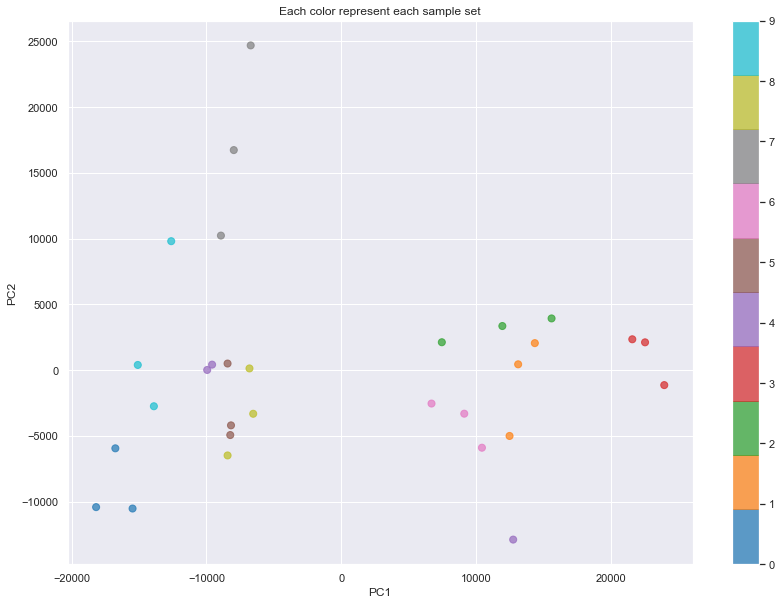

In [4]:
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.decomposition import PCA
plt.figure(figsize = (14,10))
plt.scatter(X_transformed[:,0], X_transformed[:,1], c = y, s = 50, cmap = 'tab10', alpha = 0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.title('Each color represent each sample set')
plt.show()

### Applying Kmeans algorithm to the reduced dimension(Applied PCA) of the dataset

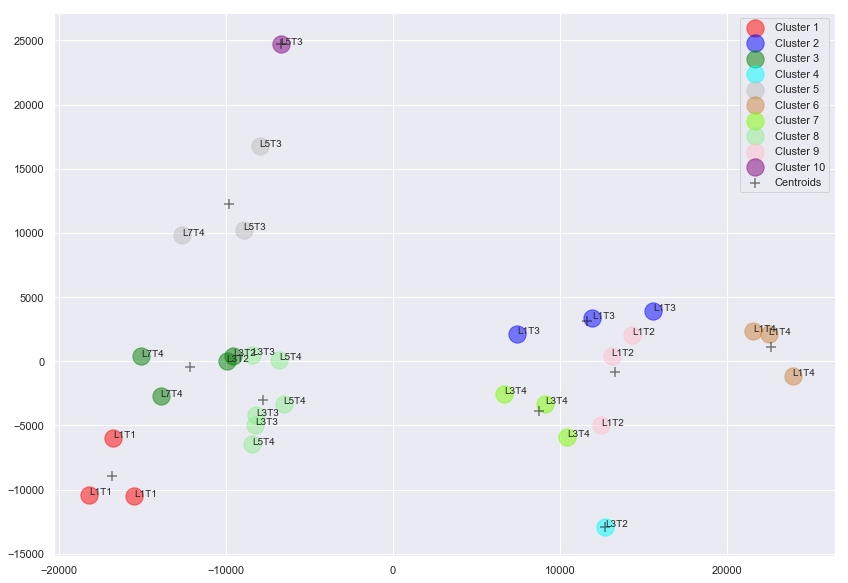

In [5]:
#from sklearn.cluster import KMeans
#import matplotlib.pyplot as plt
Kmeans = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 300, n_init = 100) #Creating the Kmeans algorith object
Kmeans.fit(X_transformed)
y_kmeans = Kmeans.fit_predict(X_transformed) #fitting the learning model to the PCA transformed raw data and predicting the clusters for the samples
plt.rc('font', size = 10) #setting the front size in the plot
fig, ax = plt.subplots(figsize = (14,10)) #figure size
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 1], s = 300, c = 'red', label = 'Cluster 1', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 1], s = 300, c = 'blue', label = 'Cluster 2', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 2, 0], X_transformed[y_kmeans == 2, 1], s = 300, c = 'green', label = 'Cluster 3', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 3, 0], X_transformed[y_kmeans == 3, 1], s = 300, c = 'cyan', label = 'Cluster 4', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 4, 0], X_transformed[y_kmeans == 4, 1], s = 300, c = 'silver', label = 'Cluster 5', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 5, 0], X_transformed[y_kmeans == 5, 1], s = 300, c = 'peru', label = 'Cluster 6',alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 6, 0], X_transformed[y_kmeans == 6, 1], s = 300, c = 'lawngreen', label = 'Cluster 7', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 7, 0], X_transformed[y_kmeans == 7, 1], s = 300, c = 'lightgreen', label = 'Cluster 8', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 8, 0], X_transformed[y_kmeans == 8, 1], s = 300, c = 'pink', label = 'Cluster 9', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans == 9, 0], X_transformed[y_kmeans == 9, 1], s = 300, c = 'purple', label = 'Cluster 10', alpha = 0.5)
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], s = 100, marker = '+', c = 'black', label = 'Centroids', alpha = 0.5)
for i, txt in enumerate(sample_list):
    ax.annotate(txt, (X_transformed[:,0][i], X_transformed[:,1][i]))
plt.legend()
#plt.savefig('C:/Users/Tamal/Documents/Thesis Files/Images/Kmeans/Kmeans_reducedDimension_RawData.png', dpi = 200)
plt.show()

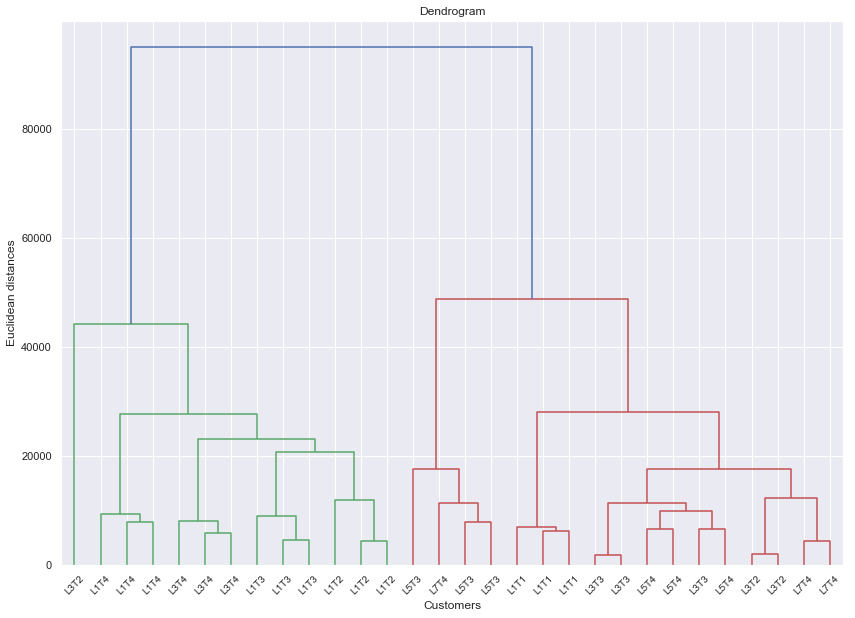

In [6]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (14,10))
dendrogram = sch.dendrogram(sch.linkage(X_transformed, method = 'ward'), labels = sample_list)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

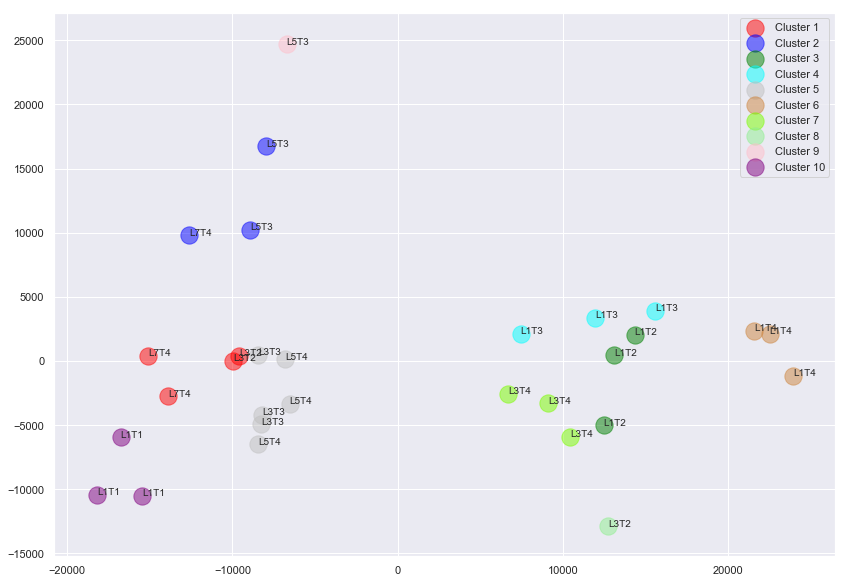

In [7]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_transformed)

plt.rc('font', size = 10) #setting the front size in the plot
fig, ax = plt.subplots(figsize = (14,10)) #figure size
plt.scatter(X_transformed[y_hc == 0, 0], X_transformed[y_hc == 0, 1], s = 300, c = 'red', label = 'Cluster 1', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 1, 0], X_transformed[y_hc == 1, 1], s = 300, c = 'blue', label = 'Cluster 2', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 2, 0], X_transformed[y_hc == 2, 1], s = 300, c = 'green', label = 'Cluster 3', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 3, 0], X_transformed[y_hc == 3, 1], s = 300, c = 'cyan', label = 'Cluster 4', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 4, 0], X_transformed[y_hc == 4, 1], s = 300, c = 'silver', label = 'Cluster 5', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 5, 0], X_transformed[y_hc == 5, 1], s = 300, c = 'peru', label = 'Cluster 6',alpha = 0.5)
plt.scatter(X_transformed[y_hc == 6, 0], X_transformed[y_hc == 6, 1], s = 300, c = 'lawngreen', label = 'Cluster 7', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 7, 0], X_transformed[y_hc == 7, 1], s = 300, c = 'lightgreen', label = 'Cluster 8', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 8, 0], X_transformed[y_hc == 8, 1], s = 300, c = 'pink', label = 'Cluster 9', alpha = 0.5)
plt.scatter(X_transformed[y_hc == 9, 0], X_transformed[y_hc == 9, 1], s = 300, c = 'purple', label = 'Cluster 10', alpha = 0.5)
for i, txt in enumerate(sample_list):
    ax.annotate(txt, (X_transformed[:,0][i], X_transformed[:,1][i]))
plt.legend()
#plt.savefig('C:/Users/Tamal/Documents/Thesis Files/Images/Kmeans/KMeans_Rawdata.png', dpi = 200)
plt.show()

### Evaluation of the learned Kmeans model by comparing to the actual data label.

The accuracy score for optimized K-means algorithm 0.8.


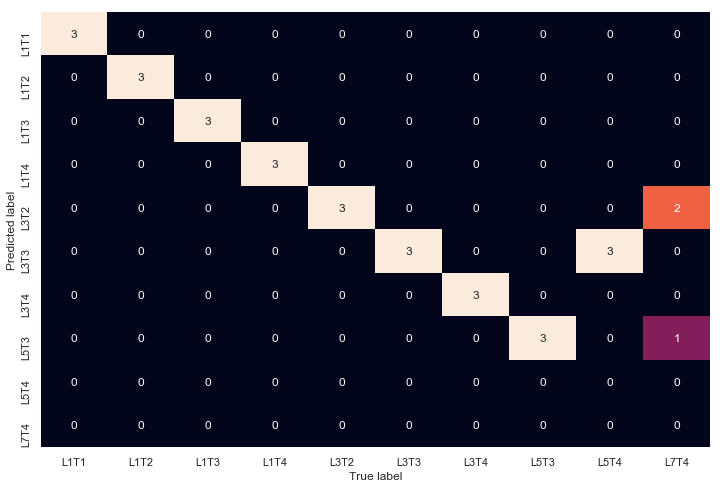

In [8]:
#from scipy.stats import mode
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix
#import numpy as np
labels = np.zeros_like(y_kmeans)
for i in range(10):
    mask = (y_kmeans == i)
    labels[mask] = mode(y[mask])[0]

acc_score = accuracy_score(y, labels)
print('The accuracy score for optimized K-means algorithm {}.'.format(acc_score))
mat = confusion_matrix(y, labels)
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(mat.T, square = False, annot = True, fmt = 'd', cbar = False, xticklabels = set_sample, yticklabels = set_sample)
plt.xlabel('True label')
plt.ylabel('Predicted label')
#plt.savefig('C:/Users/Tamal/Documents/Thesis Files/Images/Kmeans/ConfusionMatrix_Kmeans_reducedDimension_RawData.png', dpi = 200)
plt.show()

#### For different number of principal components the Kmeans algorithm performs same

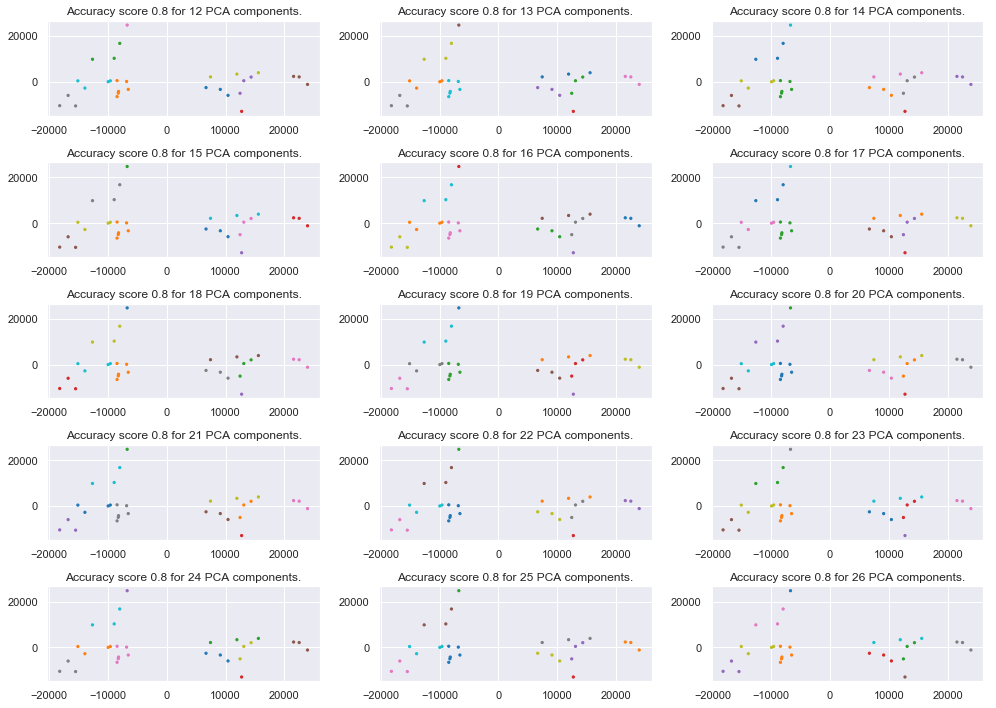

In [9]:
pca_components = [*range(num_components - 15, num_components)]

fig, ax = plt.subplots(5, 3, figsize=(14, 10))
ax = np.ravel(ax)
fig.subplots_adjust(hspace = 0.01, wspace = 0.1)
for i in range(15):
    Kmeans_opt = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 300, n_init = 100)
    pca_cps = PCA(n_components = pca_components[i])
    X_pca = pca_cps.fit_transform(X)
    y_kmeans_opt = Kmeans_opt.fit_predict(X_pca)
    labels = np.zeros_like(y_kmeans_opt)
    for j in range(10):
        mask = (y_kmeans_opt == j)
        labels[mask] = mode(y[mask])[0]
    acc_score = accuracy_score(y, labels)
    ax[i].scatter(X_pca[:, 0], X_pca[:, 1], c = y_kmeans_opt, s = 5, cmap='tab10')
    ax[i].title.set_text('Accuracy score {} for {} PCA components.'.format(acc_score, pca_components[i]))
plt.tight_layout()  
#fig.savefig('C:/Users/Tamal/Documents/Thesis Files/Images/Kmeans/different_no.PCA_components_PCA_RawData.png', dpi = 200)

### Limitation of K-means
By defining random state, it is possible to get deterministic result for K-means algorithm. Here for random state 19 or 35 with n_init(number of times the Kmeans will run with different centroid) 1 and 2, we get 93% accuracy. But after n_init >= 3 converge the optimal result. So for the optimal result, the random state was not included.

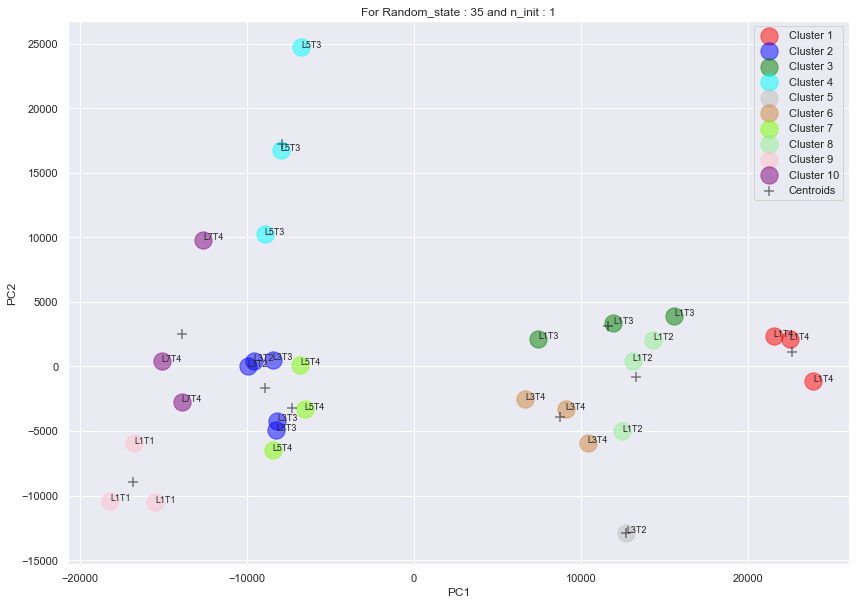

In [10]:
Kmeans_cen = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 300, n_init = 1, random_state = 35)
y_kmeans_cen = Kmeans_cen.fit_predict(X_transformed)
cluster_cen = Kmeans_cen.cluster_centers_
plt.rc('font', size = 9)
fig, ax = plt.subplots(figsize = ((14,10)))
plt.scatter(X_transformed[y_kmeans_cen == 0, 0], X_transformed[y_kmeans_cen == 0, 1], s = 300, c = 'red', label = 'Cluster 1', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans_cen == 1, 0], X_transformed[y_kmeans_cen == 1, 1], s = 300, c = 'blue', label = 'Cluster 2', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans_cen == 2, 0], X_transformed[y_kmeans_cen == 2, 1], s = 300, c = 'green', label = 'Cluster 3', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans_cen == 3, 0], X_transformed[y_kmeans_cen == 3, 1], s = 300, c = 'cyan', label = 'Cluster 4', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans_cen == 4, 0], X_transformed[y_kmeans_cen == 4, 1], s = 300, c = 'silver', label = 'Cluster 5', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans_cen == 5, 0], X_transformed[y_kmeans_cen == 5, 1], s = 300, c = 'peru', label = 'Cluster 6',alpha = 0.5)
plt.scatter(X_transformed[y_kmeans_cen == 6, 0], X_transformed[y_kmeans_cen == 6, 1], s = 300, c = 'lawngreen', label = 'Cluster 7', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans_cen == 7, 0], X_transformed[y_kmeans_cen == 7, 1], s = 300, c = 'lightgreen', label = 'Cluster 8', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans_cen == 8, 0], X_transformed[y_kmeans_cen == 8, 1], s = 300, c = 'pink', label = 'Cluster 9', alpha = 0.5)
plt.scatter(X_transformed[y_kmeans_cen == 9, 0], X_transformed[y_kmeans_cen == 9, 1], s = 300, c = 'purple', label = 'Cluster 10', alpha = 0.5)
plt.scatter(Kmeans_cen.cluster_centers_[:, 0], Kmeans_cen.cluster_centers_[:, 1], s = 100, marker = '+', c = 'black', label = 'Centroids', alpha = 0.5)
for i, txt in enumerate(sample_list):
    ax.annotate(txt, (X_transformed[:,0][i], X_transformed[:,1][i]))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('For Random_state : 35 and n_init : 1')
plt.legend()
#fig.savefig('C:/Users/Tamal/Documents/Thesis Files/Images/Kmeans/Limitation_PCA_RawData_randomState 19or35_ninit 1or2.png', dpi = 200)
plt.show()

In [11]:
labels = np.zeros_like(y_kmeans_cen)
for i in range(10):
    mask = (y_kmeans_cen == i)
    labels[mask] = mode(y[mask])[0]

acc_score = accuracy_score(y, labels)
print('The accuracy score for optimized K-means algorithm {}.'.format(acc_score))

The accuracy score for optimized K-means algorithm 0.9333333333333333.
